In [28]:
import numpy as np, matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
from os.path import dirname, join

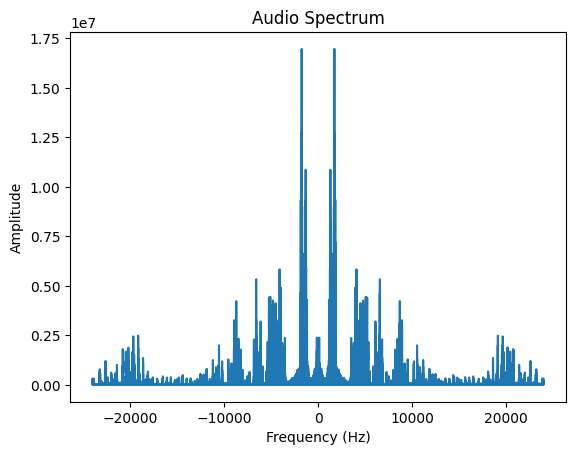

1742.2077922077922
16972802.06770863


In [63]:
filename = "C:\\Users\\Lim ZY\\Documents\\NUS\\Y1S2\\CP2107\\AudioCast\\ggwave_hello_example.wav"
fs, data = wavfile.read(filename) # load the data (fs is the sampling rate)
if data.ndim > 1:
    data = data.mean(1)

# SHOW FREQUENCIES
fftData = np.fft.fft(data)
freqBins = np.fft.fftfreq(len(fftData), 1 / fs)
plt.plot(freqBins, np.abs(fftData))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Audio Spectrum')
plt.show()

# print frequency with highest coefficient and its amplitude
idx = np.argmax(np.abs(fftData))
freq = freqBins[idx]
freq_in_hertz = abs(freq)
print(freq_in_hertz)
print(max(np.abs(fftData)))


# a = data.T[0] # this is a two channel soundtrack, I get the first track
# b = [(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
# c = fft(b) # calculate fourier transform (complex numbers list)
# d = len(c)/2  # you only need half of the fft list (real signal symmetry)
# plt.plot(abs(c[:int(d-1)]),'r')
# plt.show()

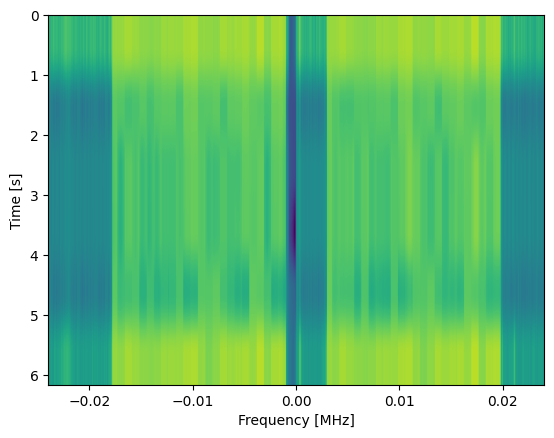

1742.2077922077922
16972802.06770863


In [72]:
filename = "C:\\Users\\Lim ZY\\Documents\\NUS\\Y1S2\\CP2107\\AudioCast\\ggwave_hello_example.wav"
fs, data = wavfile.read(filename) # load the data (fs is the sampling rate)
if data.ndim > 1:
    data = data.mean(1)

fftData = np.fft.fft(data)
freqBins = np.fft.fftfreq(len(fftData), 1 / fs)

fft_size = fs
num_rows = len(fftData) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(fftData[i*fft_size:(i+1)*fft_size])))**2)

plt.imshow(spectrogram, aspect='auto', extent = [fs/-2/1e6, fs/2/1e6, len(fftData)/fs, 0])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()

# print frequency with highest coefficient and its amplitude
idx = np.argmax(np.abs(fftData))
freq = freqBins[idx]
freq_in_hertz = abs(freq)
print(freq_in_hertz)
print(max(np.abs(fftData)))

## Simple FFT Example

Text(0, 0.5, 'Value of x(t)')

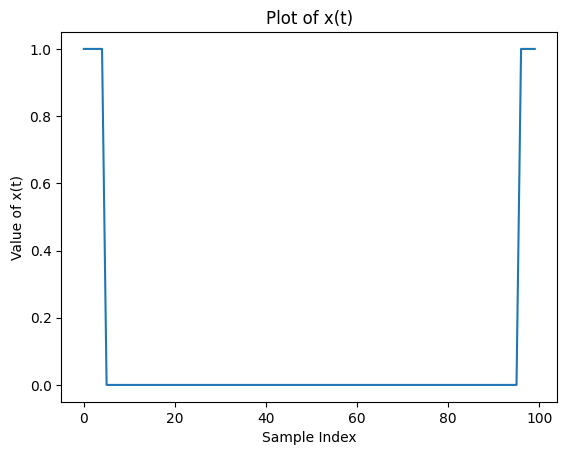

In [16]:
# define x(t) as a pulse function
num_t = 100
xt = np.zeros(num_t)
# xt[:10] = 1     # set 0 to 9 to be value 1
xt[:5] = 1
xt[-4:] = 1
plt.plot(xt)
plt.title("Plot of x(t)")
plt.xlabel("Sample Index")
plt.ylabel("Value of x(t)")

Text(0, 0.5, 'Magnitube')

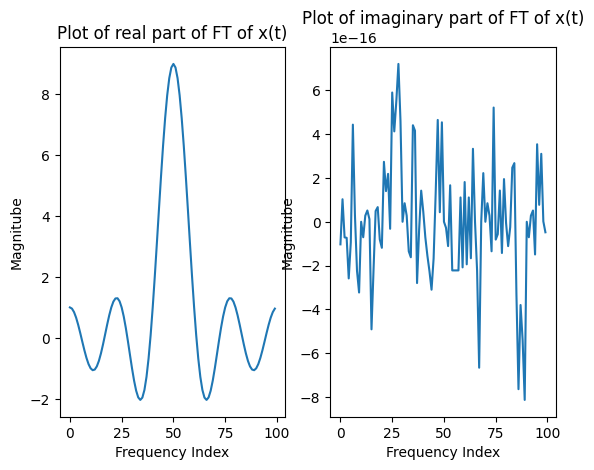

In [17]:
fxt = np.fft.fft(xt)
# First plot is the real part of FFT
plt.subplot(1, 2, 1)
plt.plot(np.fft.fftshift(np.real(fxt)))
plt.title("Plot of real part of FT of x(t)")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitube")
# Second plot is the imaginary part of FFT
plt.subplot(1, 2, 2)
plt.plot(np.fft.fftshift(np.imag(fxt)))
plt.title("Plot of imaginary part of FT of x(t)")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitube")

Text(0, 0.5, 'Angle')

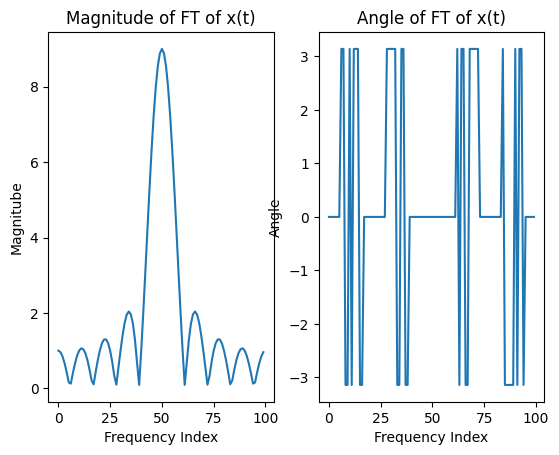

In [18]:
# Plot in polar form
# First plot is the real part of FFT
plt.subplot(1, 2, 1)
plt.plot(np.fft.fftshift(np.abs(fxt)))
plt.title("Magnitude of FT of x(t)")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitube")
# Second plot is the imaginary part of FFT
plt.subplot(1, 2, 2)
plt.plot(np.fft.fftshift(np.angle(fxt)))
plt.title("Angle of FT of x(t)")
plt.xlabel("Frequency Index")
plt.ylabel("Angle")